In [3]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [4]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [13]:
data = data.dropna()

In [14]:
data.index = pd.to_datetime(data.index)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [15]:
split_1 = int(len(data)*0.6)
split_2 = int(len(data)*0.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [36]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [33]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [37]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [30]:
import matplotlib.pyplot as plt

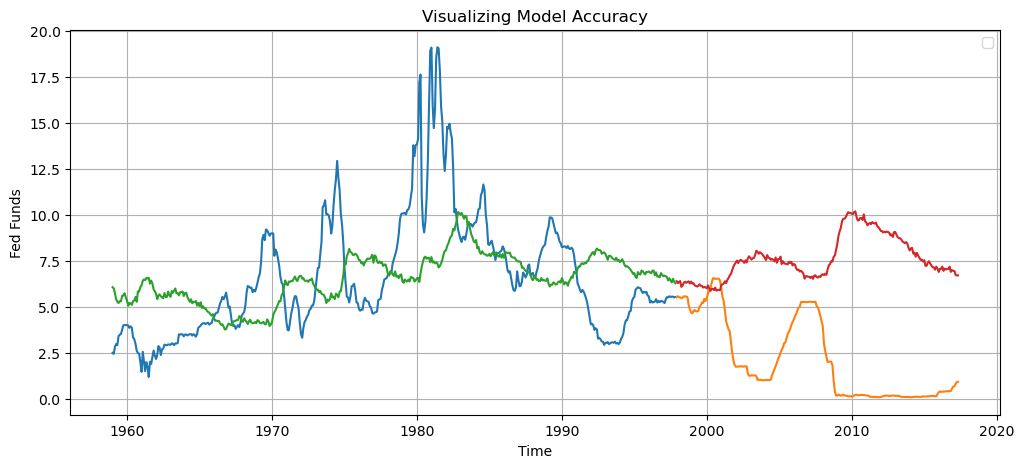

In [40]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [44]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.342261026777946
Outsample MSE :  39.862209348094424


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [115]:
max_degrees = 3


DEGREE: 1


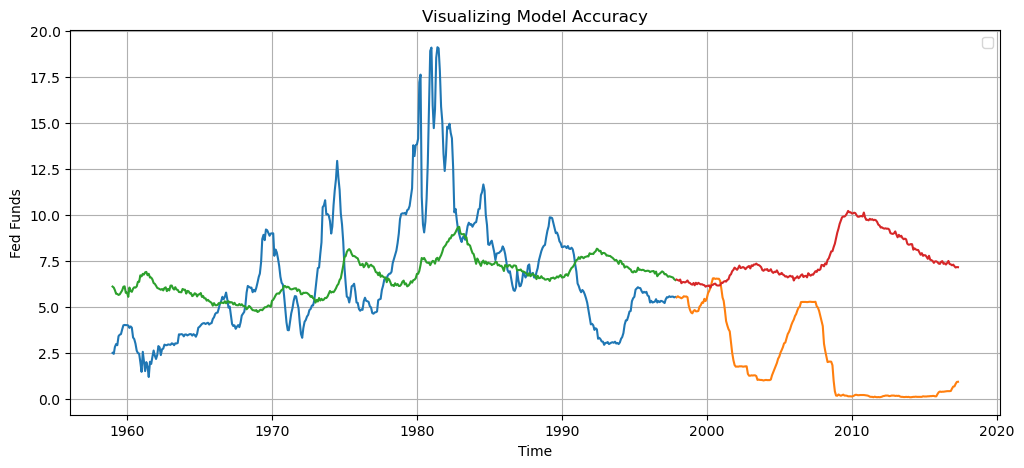

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566845
DEGREE: 2


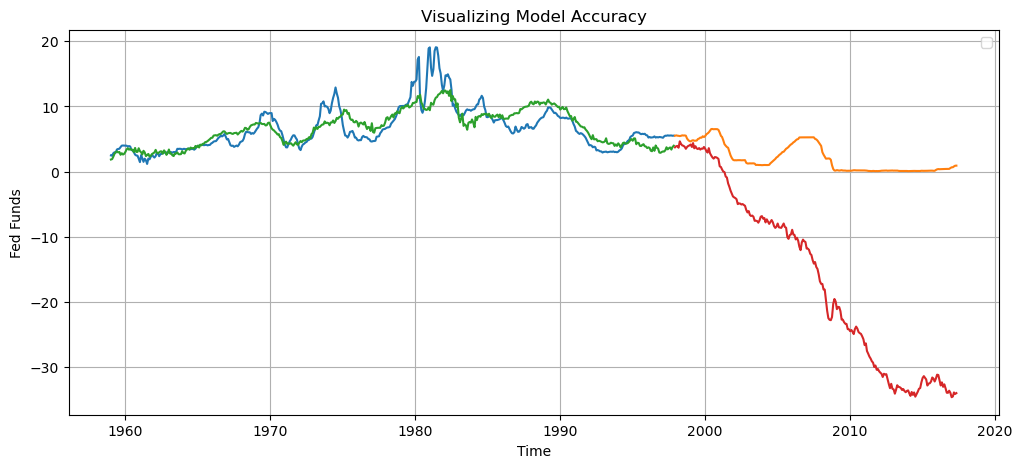

Insample MSE :  3.8634771392760676
Outsample MSE :  481.44650989868535
DEGREE: 3


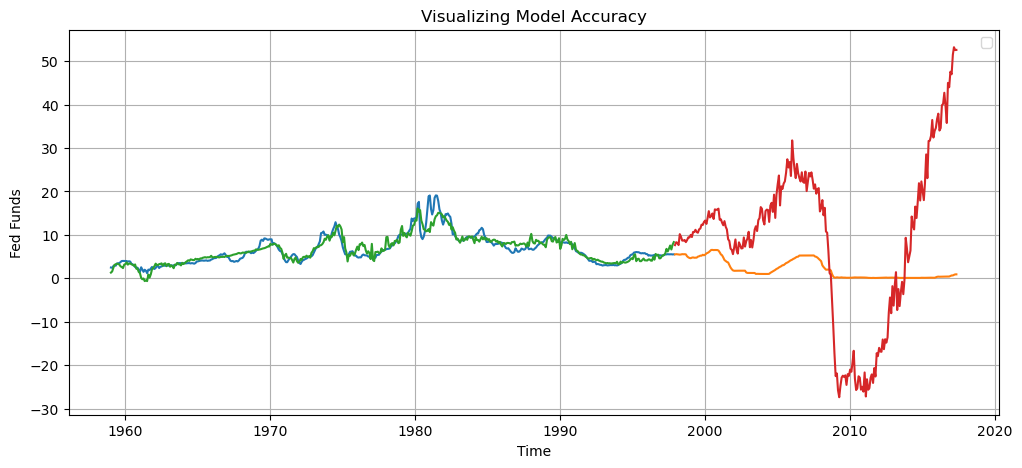

Insample MSE :  1.8723636265557055
Outsample MSE :  371.76804341025513


In [116]:
for degrees in range(1,max_degrees+1):
    print("DEGREE:", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    plt.figure(figsize = (12,5))
    
    ##
    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(y_in.index,model1.predict(X_in_poly))
    plt.plot(y_out.index,model1.predict(X_out_poly))
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    

# 7.) State your observations :

The relationship between model complexity, characterized by the inclusion of additional polynomial features, and the associated Mean Squared Error (MSE) is evident in the following observation: as the model becomes more intricate, the in-sample MSE decreases while the out-sample MSE increases. 

This scenario serves as a clear illustration of the trade-off between bias and variance in machine learning. The higher complexity leads to a reduction in bias, resulting in a lower in-sample MSE; however, the increase in variance simultaneously contributes to a larger out-sample MSE. 
